## Hybrid Genetic Search meta-heuristic example

The meta-heuristic used is [vidalt/HGS-CVRP: Modern implementation of the hybrid genetic search (HGS) algorithm specialized to the capacitated vehicle routing problem (CVRP). This code also includes an additional neighborhood called SWAP\*.](https://github.com/vidalt/HGS-CVRP)

HGS-CVRP can only produce *radial* topologies. Since a *radial* topology is a special case of the *branched* topology, solutions produced by this method can be used to warm-start both *branched*- and *radial*-topology models.

If a routeset is desired, use *PathFinder*.

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.baselines.hgs import hgs_multiroot
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.pathfinding import PathFinder
from optiwindnet.interarraylib import G_from_S, as_normalized

### Load Hornsea

In [2]:
locations = load_repository()

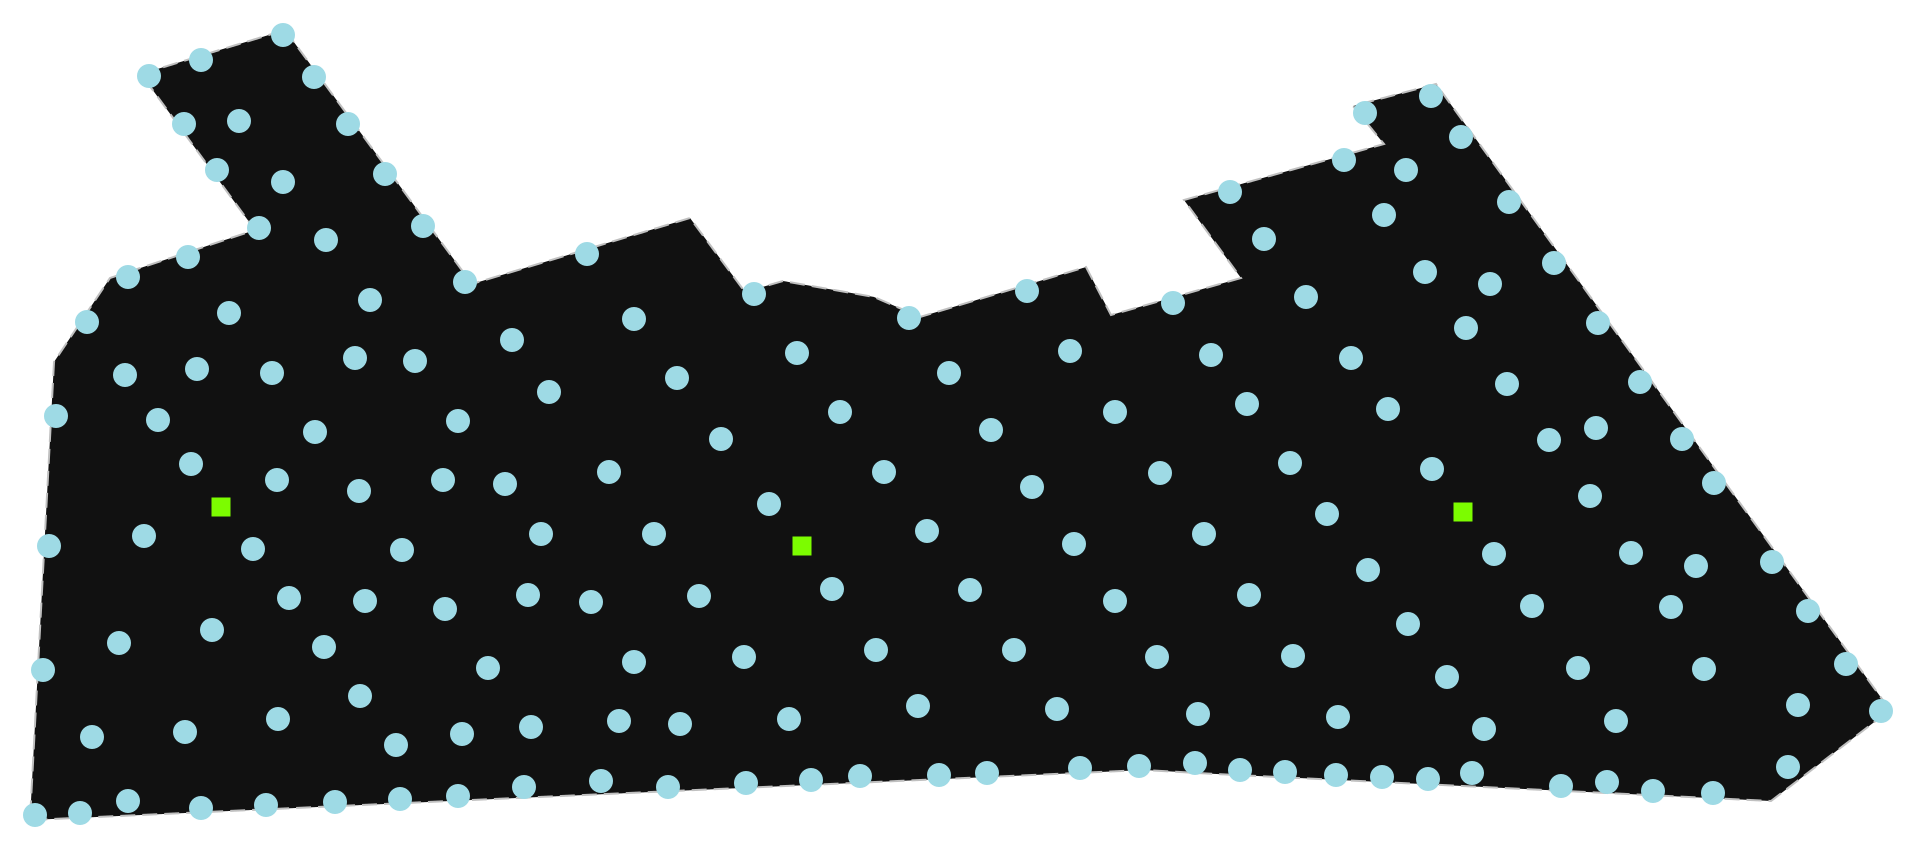

In [3]:
L = locations.hornsea
svgplot(L)

### Optimize Hornsea

(0.24, 0.34, 0.28)


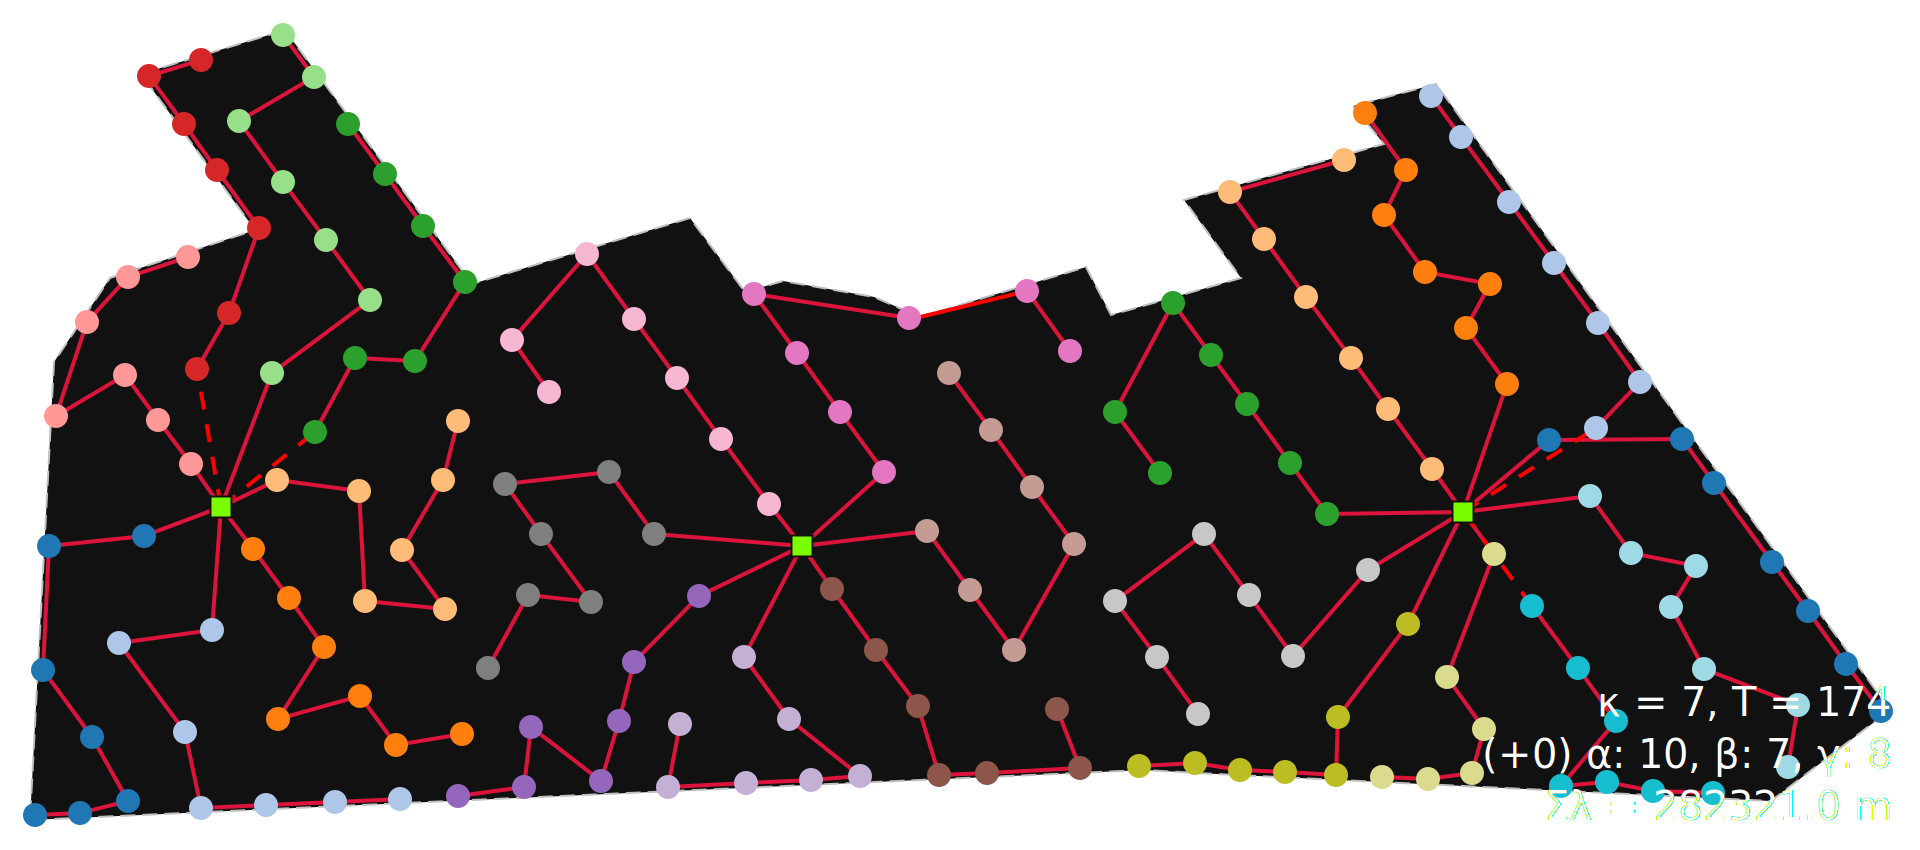

In [4]:
P, A = make_planar_embedding(L)
S = hgs_multiroot(as_normalized(A), capacity=7, time_limit=0.5)
print(S.graph['solution_time'])
G = G_from_S(S, A)
svgplot(G)

### Route the feeders so as to avoid crossings

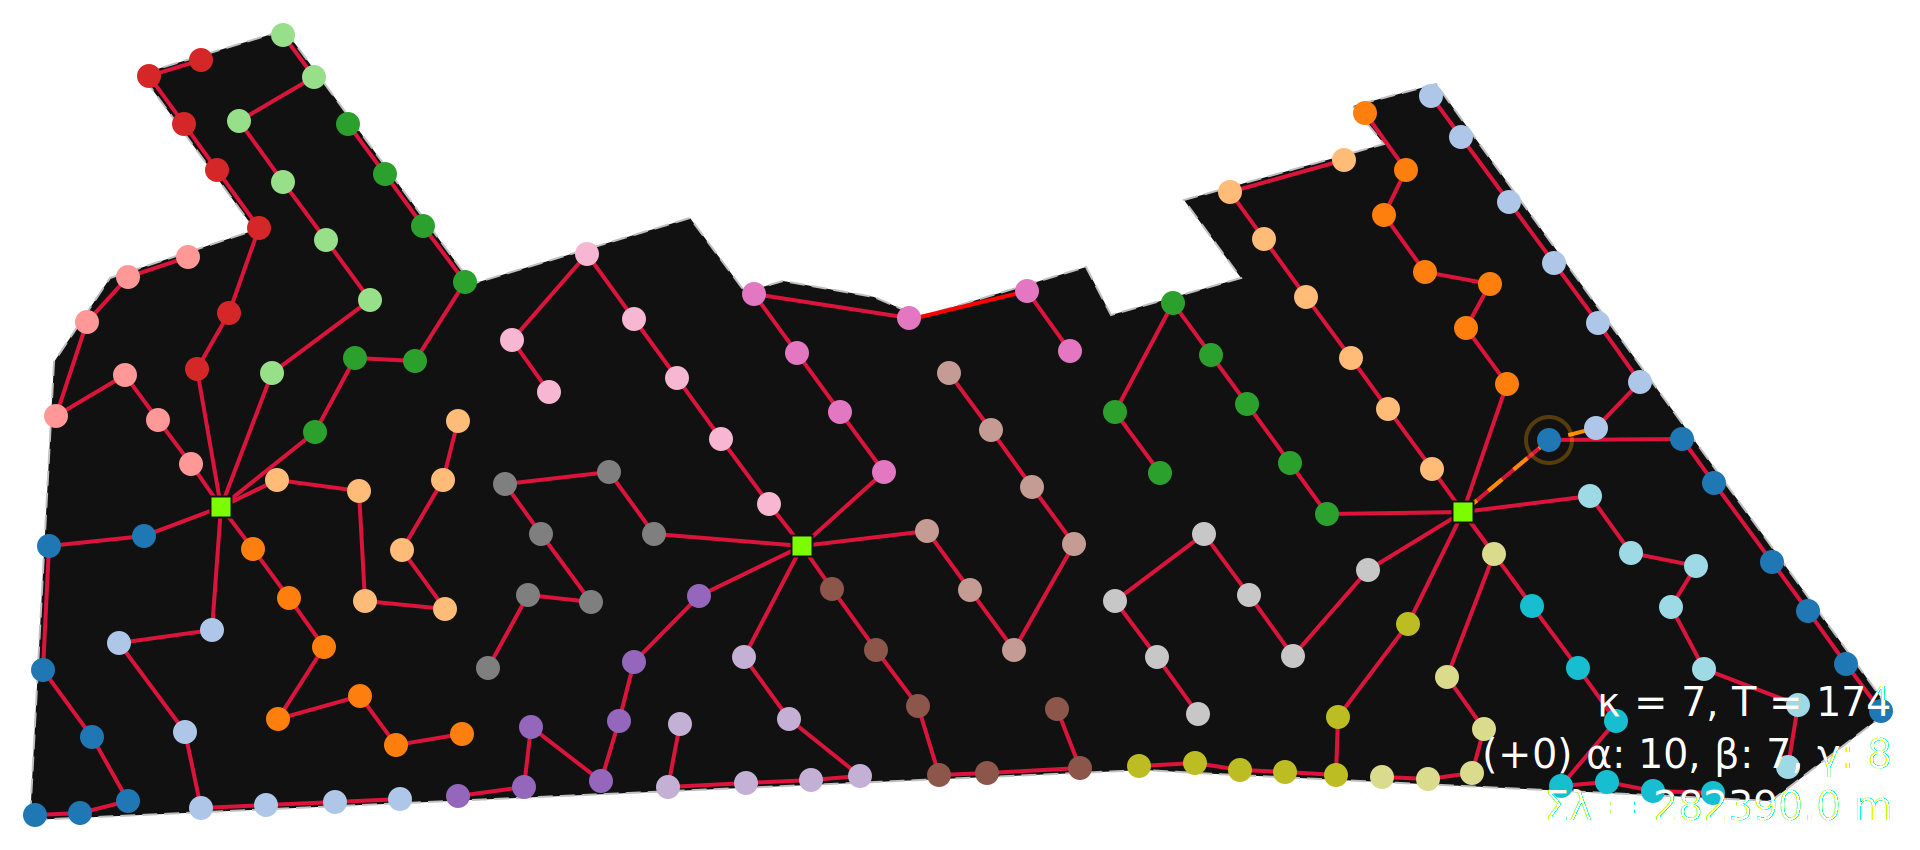

In [5]:
H = PathFinder(G, P, A).create_detours()
svgplot(H)